Importing modules

In [144]:
from PIL import Image
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
import cv2
import glob


# This is a value for the termination criterion of the subpixel corner localizer
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

Creation of the 3D point coordinates and loading images

In [145]:
# Here you have 3D points for the checkerboard (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Here you load the image files
images = glob.glob('left/left*.jpg')

Cell 1

In [146]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
print(len(images))
counter = 0
valide_images = []
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        counter+=1
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
        valide_images.append(fname)


cv2.destroyAllWindows()




13


Cell 2

In [147]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

#the rvec is a vector representing the rotation axis, and its length encodes the angle in radians to rotate. 
#the Rodrigues method turns such a rotation vector into a 3x3 matrix.

# in total we have 11 pictures the value of ret ~0.1 so we have a good calibration

# To find the rotation matrix for each picture we simply applies the rodriguez formula seen in TD2.

# once we have the rotation matrix of ONE rvecs vector(because rvecs is a vector of rotations vectors, for each of our
# 11 patenrs). We use the rodriguez formula to find the rotation matrix, and once we have it we add the translation
# vector (in tvecs which represtents a vector of translation vectors for each pattern/picture), to create our 
# extrinsic matrix for one pattern. And we rpeate this procedure for each pattern




# test
print("mtx == ",mtx)

rotation_0,_ = cv2.Rodrigues(rvecs[0])
print("det rotation_0 =",np.linalg.det(rotation_0))
M_ext_0 = np.array(np.hstack((rotation_0,tvecs[0])),dtype=float)
M_camera_0 = np.dot(mtx, M_ext_0)
print(M_camera_0)

rotation_1,_= cv2.Rodrigues(rvecs[1])
print("det rotation_1 =",np.linalg.det(rotation_1))
M_ext_1 = np.array(np.hstack((rotation_1,tvecs[1])),dtype=float)
M_camera_1 =np.dot(mtx, M_ext_1)
print(M_camera_1)

rotation_2,_ = cv2.Rodrigues( rvecs[2])
print("det rotation_2 =",np.linalg.det(rotation_2))
M_ext_2 = np.array(np.hstack((rotation_2,tvecs[2])),dtype=float)
M_camera_2 = np.dot(mtx, M_ext_2)
print(M_camera_2)

rotation_3,_= cv2.Rodrigues(rvecs[3])
print("det rotation_3 =",np.linalg.det(rotation_3))
M_ext_3 = np.array(np.hstack((rotation_3,tvecs[3])),dtype=float)
M_camera_3 = np.dot(mtx, M_ext_3)
print(M_camera_3)

rotation_4,_ = cv2.Rodrigues(rvecs[4])
print("det rotation_4 =",np.linalg.det(rotation_4))
M_ext_4 = np.array(np.hstack((rotation_4,tvecs[4])),dtype=float)
M_camera_4 = np.dot(mtx, M_ext_4)
print(M_camera_4)
# ...




mtx ==  [[534.07088364   0.         341.53407553]
 [  0.         534.11914595 232.9456526 ]
 [  0.           0.           1.        ]]
det rotation_0 = 1.0000000000000004
[[-4.20818148e+02 -6.11700780e+01  4.70156932e+02  7.10303538e+03]
 [ 4.45519202e+01 -5.64957870e+02  1.35590083e+02  3.94155712e+03]
 [ 2.71751068e-01 -1.63273781e-01  9.48416063e-01  1.48593055e+01]]
det rotation_1 = 0.9999999999999999
[[ 1.23637697e+02  5.10618942e+02  3.54766471e+02  2.06367529e+03]
 [-4.09585212e+02 -3.21169746e+01  4.13225596e+02  3.86361442e+03]
 [ 3.70962163e-01 -6.45998576e-02  9.26398366e-01  1.05769926e+01]]
det rotation_2 = 0.9999999999999999
[[-3.18859623e+02  4.44216282e+02  3.20745489e+02  4.69952348e+03]
 [-5.52336834e+02 -1.77080640e+02 -5.57979247e+01  5.53183156e+03]
 [-4.50603040e-01 -1.85169023e-01  8.73309414e-01  1.56731179e+01]]
det rotation_3 = 0.9999999999999999
[[ 1.54859915e+02 -6.09317938e+02  8.14081749e+01  5.22599903e+03]
 [ 5.66922600e+02  3.10281350e+01  1.31083786e+0

Camera matrix refinement

In [148]:
img = cv2.imread('left/left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

Cell 3

In [149]:
# 1
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult1.png',dst)

# 2
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult2.png',dst)

True

Cell 4

this cell computes the rate of error of finding corners and calibrating pattern. When this value approaches 0
this will mean that there are no errors and the calibration was perfect. This implies that cv.findChessboardCorners(...) shall alwayes return true.

In [150]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.023686000375385673


Section B

In [151]:
# Load from text file
tp= np.loadtxt("teapot.txt",usecols=range(3))
# Number of points in the cloud
n_points = np.shape(tp)
# Transpose and add a fourth coordinate with unitary value 
# (homogeneous coordinates)
tp = np.hstack((tp,np.ones((n_points[0],1),dtype=np.float))).T
# Save it in a data frame
df = pd.DataFrame({"x" : tp[0,:], "y" :tp[1,:], "z" : tp[2,:], 
                                                "w": tp[3,:]})

In [152]:
print(df)

             x         y        z    w
0     1.381370  0.000000  2.45469  1.0
1     1.400000  0.000000  2.40000  1.0
2     1.350740 -0.375926  2.40000  1.0
3     1.332760 -0.370922  2.45469  1.0
4     1.384260  0.000000  2.48750  1.0
...        ...       ...      ...  ...
1172  0.205180  0.120647  2.88333  1.0
1173  0.268946  0.075078  3.12708  1.0
1174  0.350254  0.097771  3.06667  1.0
1175  0.313617  0.087529  2.98125  1.0
1176  0.228728  0.063803  2.88333  1.0

[1177 rows x 4 columns]


In [153]:
M_cameras = []
def update_graph(num,i):
    # Load point cloud from data frame
    tp=np.vstack((df['x'],df['y'],df['z'],df['w']))
    xs = tp[0]
    ys = tp[1]
    zs = tp[2]
    for i in range(len(xs)):
        xs[i] *= 0.5

    for i in range (len(ys)):
        ys[i] *= 0.5
    
    for i in range(len(zs)):
        zs[i] *= -0.5 
   
    tp_r = np.dot(M_cameras[i],tp)
    graph._offsets3d = (tp_r[0,:], tp_r[1,:], tp_r[2,:])
    return graph

xs =  [1.38137  1.4      1.35074  ... 0.350254 0.313617 0.228728]
ys =  [ 0.        0.       -0.375926 ...  0.097771  0.087529  0.063803]
zs =  [2.45469 2.4     2.4     ... 3.06667 2.98125 2.88333]
xs =  [0.690685  0.7       0.67537   ... 0.175127  0.1568085 0.114364 ]
ys =  [ 0.         0.        -0.187963  ...  0.0488855  0.0437645  0.0319015]
zs =  [-1.227345 -1.2      -1.2      ... -1.533335 -1.490625 -1.441665]
left\left8.jpg


<IPython.core.display.Javascript object>


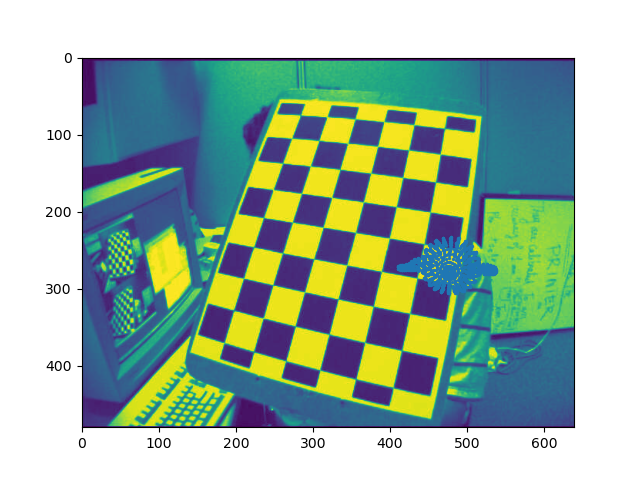

left\left7.jpg


<IPython.core.display.Javascript object>


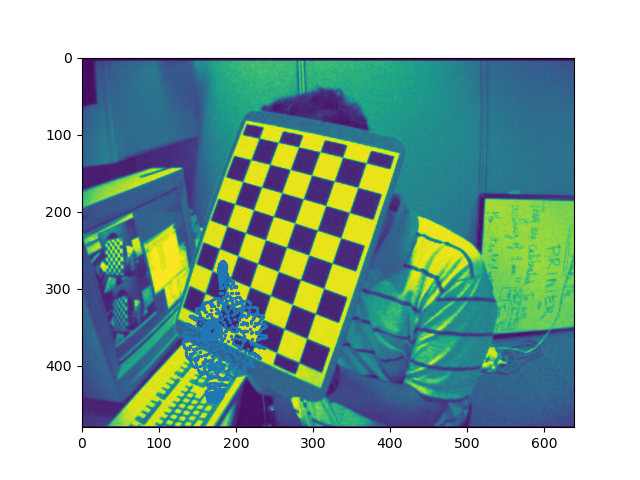

left\left6.jpg


<IPython.core.display.Javascript object>


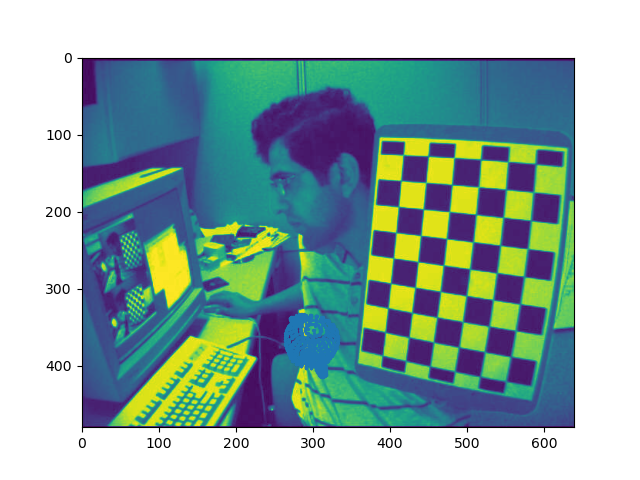

left\left5.jpg


<IPython.core.display.Javascript object>


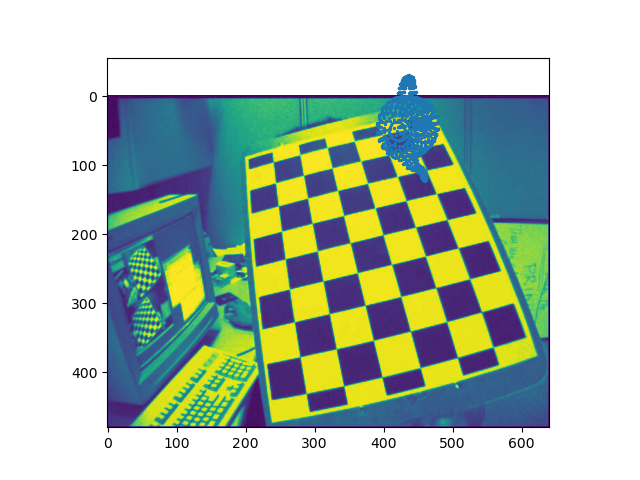

left\left4.jpg


<IPython.core.display.Javascript object>


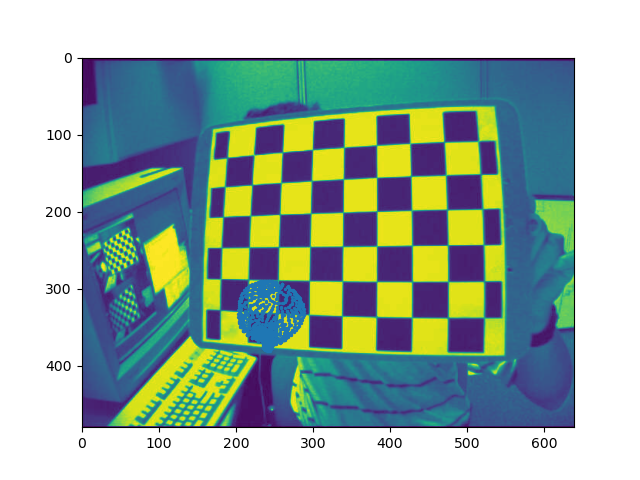

left\left3.jpg


<IPython.core.display.Javascript object>


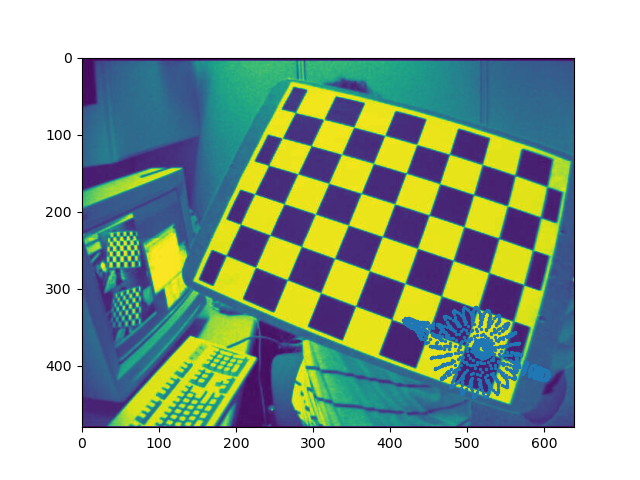

left\left2.jpg


<IPython.core.display.Javascript object>


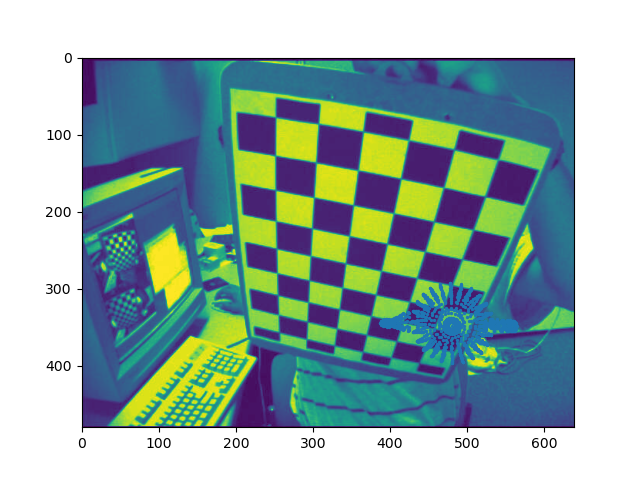

left\left14.jpg


<IPython.core.display.Javascript object>


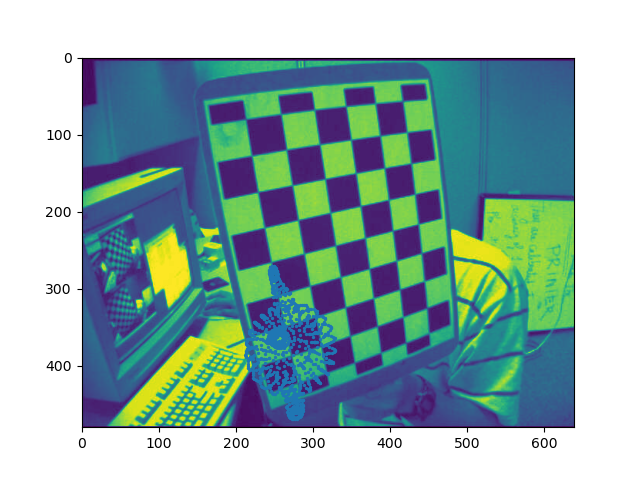

left\left13.jpg


<IPython.core.display.Javascript object>


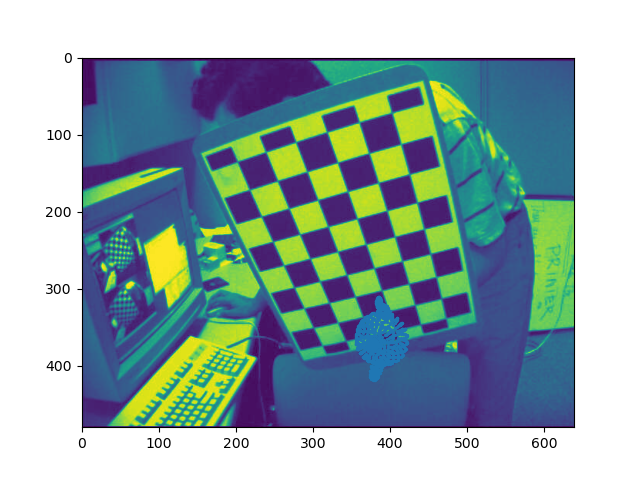

left\left12.jpg


<IPython.core.display.Javascript object>


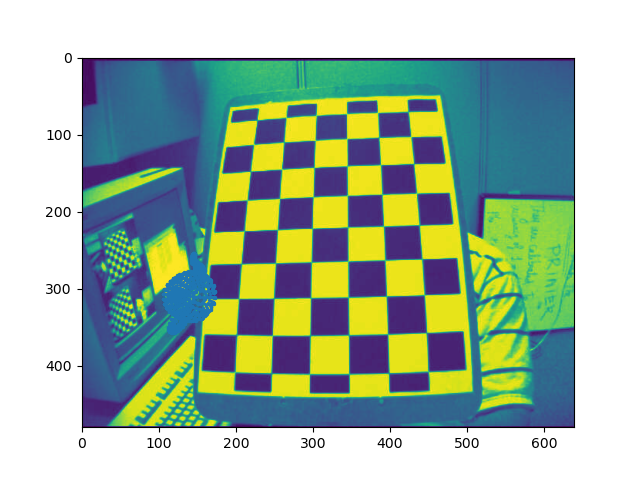

left\left1.jpg


<IPython.core.display.Javascript object>


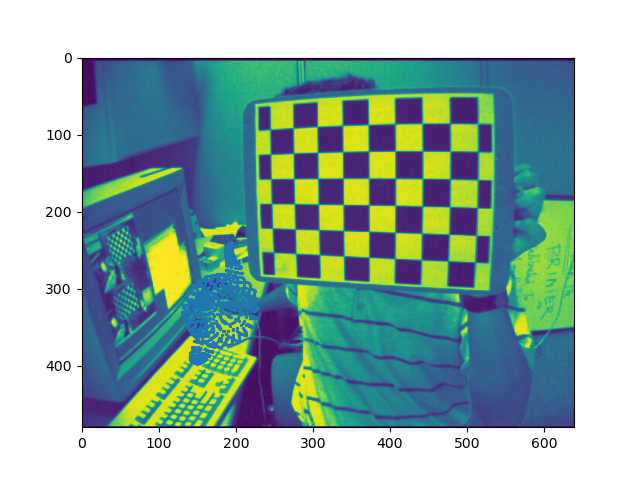

In [155]:
for i in range(counter):
    rotation,_ = cv2.Rodrigues(rvecs[i])
    M_cameras.append(np.dot(mtx, np.array(np.hstack((rotation,tvecs[i])),dtype=float)))


# question 3
tp2=np.vstack((df['x'],df['y'],df['z'],df['w']))

xs = tp2[0]
ys = tp2[1]
zs = tp2[2]

print("xs = ", xs)
print("ys = ", ys)
print("zs = ", zs)

for i in range(len(xs)):
    xs[i] *= 0.5

for i in range (len(ys)):
    ys[i] *= 0.5
    
for i in range(len(zs)):
    zs[i] *= -0.5 
    
print("xs = ", xs)
print("ys = ", ys)
print("zs = ", zs)

valide_images.reverse()

for i in range(counter):
    
    u_sim=np.dot(M_cameras[i],tp2)
    u_sim = u_sim/u_sim[2,:]
    imgname = valide_images.pop()
    print(imgname)
    img=mpimg.imread(imgname)
    plt.figure()
    plt.imshow(img)
    plt.scatter(u_sim[0,:],u_sim[1,:],s=2)
    plt.show()     
    strfile="toto"+str(i)+".jpg"
    plt.savefig(strfile)
